Import the required modules
We'll get the tweets data using Snscrape

In [1]:
# Import the required Python libraries
import snscrape.modules.twitter as sntwitter # To get tweets
import pandas as pd
import numpy as np

In [8]:
from tqdm.notebook import tqdm, trange # To show how much progress is done when running time-consuming codes

In [22]:
# Declare the max number of tweets to extract
maxTweets = 150000

In [35]:
tweets_list2 = []
tweets_df2 = pd.DataFrame()

These are keywords from tweetsthat we will extract
Go on and add how many ever you think are relevant to your search

In [26]:
keyword = '(tesla OR tsla OR Elon Musk)'

Get the tweets from Snscrape
Change the since and until dates to the time period you want to use

In [27]:
# Get tweets and store it in a dataframe
# Getting tweets only between 22/02/21 and 27/02/21
p_bar = tqdm(range(10))
number=1.0
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper(keyword + ' since:2021-02-22 until:2021-02-27 lang:en').get_items()):
    if i>maxTweets:
        break
    number+=1
    tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.username])
    p_bar.set_description(f'Working on "{number}"')

In [46]:
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [29]:
# Number of tweets obtained
len(tweets_df2)

31032

In [30]:
len(tweets_list2)

31032

In [47]:
tweets_df2.tail()

,Datetime,Tweet Id,Text,Username


In [34]:
# Save a dataset to a csv
#tweets_df2.to_csv("TeslaTweets22ndTo26thFeb.csv")

In [85]:
tweets_df2 = pd.read_csv("TeslaTweets22ndTo26thFeb.csv")

In [86]:
# Add null probability and sentiment columns to the dataframe
prob_array = np.empty(len(tweets_df2))
sent_array = np.empty(len(tweets_df2))
prob_array[:] = np.NaN
sent_array[:] = np.NaN

Add null columns 'Probability' and 'Sentiment' to the dataframe
We will add the values to it in the subsequent steps

In [88]:
tweets_df2['Probability']=prob_array
tweets_df2['Sentiment']=sent_array
tweets_df2.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Probability,Sentiment
0,0,2021-02-26 23:59:16+00:00,1365451398435987456,@CygnusSlaughter @CLSGL1 @dchaill @Sarvy803213...,RubyEggRollz,NaN,NaN
1,1,2021-02-26 23:59:07+00:00,1365451357109510145,If #HCMC hits a $1 within a few months I’m buy...,KChistiansen,NaN,NaN
2,2,2021-02-26 23:58:23+00:00,1365451173939924994,@A_Woman_Speaks @elonmusk @Tesla I have a rush...,ET1HOME,NaN,NaN
3,3,2021-02-26 23:58:23+00:00,1365451173877145600,@CLSGL1 @RubyEggRollz @dchaill @Sarvy80321399 ...,CygnusSlaughter,NaN,NaN
4,4,2021-02-26 23:58:18+00:00,1365451152020672513,"@BrianPBosche “Oh, We changed the product numb...",Asma_twiter,NaN,NaN


In [89]:
# Replace NaN to empty strings for Sentiment column
tweets_df2['Sentiment'] = tweets_df2['Sentiment'].replace(np.nan, '', regex=True)

In [90]:
tweets_df2.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Probability,Sentiment
0,0,2021-02-26 23:59:16+00:00,1365451398435987456,@CygnusSlaughter @CLSGL1 @dchaill @Sarvy803213...,RubyEggRollz,NaN,
1,1,2021-02-26 23:59:07+00:00,1365451357109510145,If #HCMC hits a $1 within a few months I’m buy...,KChistiansen,NaN,
2,2,2021-02-26 23:58:23+00:00,1365451173939924994,@A_Woman_Speaks @elonmusk @Tesla I have a rush...,ET1HOME,NaN,
3,3,2021-02-26 23:58:23+00:00,1365451173877145600,@CLSGL1 @RubyEggRollz @dchaill @Sarvy80321399 ...,CygnusSlaughter,NaN,
4,4,2021-02-26 23:58:18+00:00,1365451152020672513,"@BrianPBosche “Oh, We changed the product numb...",Asma_twiter,NaN,


In [91]:
probs=[]
sentiments=[]

In [53]:
# Import the required library containing the sentiment analysis model
import flair
from flair.models import TextClassifier
from flair.data import Sentence

In [54]:
# Load the English language trained model
sentiment_model = TextClassifier.load('en-sentiment')

2021-03-01 09:43:18,410 loading file C:\Users\ACER\.flair\models\sentiment-en-mix-distillbert_3.1.pt


This step will predict the sentiment of each tweet and calculate the probability of that sentiment
Then update the value in the dataframe

In [92]:
# Perform sentiment analysis on each tweet and assign the probability and sentiment value to the respective column
p_bar = tqdm(range(10))
number=0
# Get probability and sentiment from each tweet from dataframe
for index in tweets_df2.index:
    number+=1
    sentence = Sentence(tweets_df2.at[index, 'Text'])
    sentiment_model.predict(sentence)
    tweets_df2.at[index, 'Probability']=sentence.labels[0].score
    tweets_df2.at[index, 'Sentiment']=sentence.labels[0].value
    probs.append(sentence.labels[0].score)
    sentiments.append(sentence.labels[0].value)
    p_bar.set_description(f'Working on "{number}"')

In [93]:
tweets_df2.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username,Probability,Sentiment
0,0,2021-02-26 23:59:16+00:00,1365451398435987456,@CygnusSlaughter @CLSGL1 @dchaill @Sarvy803213...,RubyEggRollz,0.924383,NEGATIVE
1,1,2021-02-26 23:59:07+00:00,1365451357109510145,If #HCMC hits a $1 within a few months I’m buy...,KChistiansen,0.997976,NEGATIVE
2,2,2021-02-26 23:58:23+00:00,1365451173939924994,@A_Woman_Speaks @elonmusk @Tesla I have a rush...,ET1HOME,0.999969,NEGATIVE
3,3,2021-02-26 23:58:23+00:00,1365451173877145600,@CLSGL1 @RubyEggRollz @dchaill @Sarvy80321399 ...,CygnusSlaughter,0.999651,NEGATIVE
4,4,2021-02-26 23:58:18+00:00,1365451152020672513,"@BrianPBosche “Oh, We changed the product numb...",Asma_twiter,0.999011,NEGATIVE


Save the dataframe into a csv if you need to

In [94]:
#tweets_df2.to_csv("TeslaTweets5DaysSentiment.csv")

This shows us we have roughly the same number of positive and negative tweets

In [96]:
# Show the number of POSITIVE and NEGATIVE tweets
tweets_df2['Sentiment'].value_counts()

POSITIVE    15771
NEGATIVE    15261
Name: Sentiment, dtype: int64

In [2]:
#tweets = pd.read_csv("TeslaTweets5DaysSentiment.csv")

In [4]:
tweets.tail()

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,Probability,Sentiment
31027,31027,31027,2021-02-22 00:00:40+00:00,1363639810829606912,⚡️ “Elon Musk needs to come clean on Tesla’s e...,PaulBirkeland,0.960687,NEGATIVE
31028,31028,31028,2021-02-22 00:00:30+00:00,1363639768039518210,Excited to buy a #Cybertruck with my #dogecoin...,DogecoinDawwww1,0.986124,POSITIVE
31029,31029,31029,2021-02-22 00:00:29+00:00,1363639765522817026,@Tesla @elonmusk when did y’all get into teeth...,SelfFarrell,0.994464,NEGATIVE
31030,31030,31030,2021-02-22 00:00:23+00:00,1363639738125615105,@Tesla @elonmusk You need a lot of silver to k...,michael57488958,0.986380,POSITIVE
31031,31031,31031,2021-02-22 00:00:11+00:00,1363639686720327687,@elonmusk Tesla made 900 million on BTC and Bi...,Jad57337075,0.999357,NEGATIVE


In [5]:
len(tweets)

31032

In [6]:
tweets['Datetime'].dtype

dtype('O')

In [3]:
# Convert the "Datetime" column from an object to a Datetime object
tweets['Datetime'] = pd.to_datetime(tweets['Datetime'])

In [140]:
tweets['Datetime'] = tweets['Datetime'].astype('str')

In [8]:
# "Datetime" column is now a datime object
tweets['Datetime'].dtype

datetime64[ns, UTC]

In [9]:
sum = [0.0, 0.0, 0.0, 0.0, 0.0]

In [4]:
# Add an empty score column to the dataframe
score_array = np.empty(len(tweets))
tweets['Score'] = score_array

In [ ]:
Instead of taking +1 for positive and -1 for negative sentiment, let us take the probability of the sentiment (with negative and positive value for positive and negative sentiment) as the score instead
This ensures that when the model was not able to accurately determine the sentiment, it won't have much effect on the final score

In [5]:
# Go through the dataframe and for POSITIVE tweets add the probability and for NEGATIVE tweets subtract the probability as the score
for index in tweets.index:
    if(tweets.at[index, 'Sentiment'] == "POSITIVE"):
        tweets.at[index, 'Score'] = tweets.at[index, 'Probability']
    elif(tweets.at[index, 'Sentiment'] == "NEGATIVE"):
        tweets.at[index, 'Score'] = -tweets.at[index, 'Probability']

In [6]:
tweets.tail()

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,Probability,Sentiment,Score
31027,31027,31027,2021-02-22 00:00:40+00:00,1363639810829606912,⚡️ “Elon Musk needs to come clean on Tesla’s e...,PaulBirkeland,0.960687,NEGATIVE,-0.960687
31028,31028,31028,2021-02-22 00:00:30+00:00,1363639768039518210,Excited to buy a #Cybertruck with my #dogecoin...,DogecoinDawwww1,0.986124,POSITIVE,0.986124
31029,31029,31029,2021-02-22 00:00:29+00:00,1363639765522817026,@Tesla @elonmusk when did y’all get into teeth...,SelfFarrell,0.994464,NEGATIVE,-0.994464
31030,31030,31030,2021-02-22 00:00:23+00:00,1363639738125615105,@Tesla @elonmusk You need a lot of silver to k...,michael57488958,0.986380,POSITIVE,0.986380
31031,31031,31031,2021-02-22 00:00:11+00:00,1363639686720327687,@elonmusk Tesla made 900 million on BTC and Bi...,Jad57337075,0.999357,NEGATIVE,-0.999357


Go through the whole time period from when the tweets were collected and sum up the sentiment scores for each hour

In [7]:
# Sum up the scores according to each hour
total = tweets.resample('H', on='Datetime').Score.sum()
total

Datetime
2021-02-22 00:00:00+00:00    24.506831
2021-02-22 01:00:00+00:00    10.413106
2021-02-22 02:00:00+00:00    26.462695
2021-02-22 03:00:00+00:00     4.257995
2021-02-22 04:00:00+00:00    11.605024
                               ...    
2021-02-26 19:00:00+00:00     9.899957
2021-02-26 20:00:00+00:00     3.744740
2021-02-26 21:00:00+00:00    20.996932
2021-02-26 22:00:00+00:00     1.897933
2021-02-26 23:00:00+00:00     7.214078
Freq: H, Name: Score, Length: 120, dtype: float64

If you're collecting tweets over many days/months it'd be better to sum the sentiments on a daily basis

In [8]:
# Sum up the scores according to each day (For finding correlation)
total_day = tweets.resample('D', on='Datetime').Score.sum()
total_day

Datetime
2021-02-22 00:00:00+00:00     39.400125
2021-02-23 00:00:00+00:00   -675.933249
2021-02-24 00:00:00+00:00    306.949269
2021-02-25 00:00:00+00:00    388.522158
2021-02-26 00:00:00+00:00    195.155528
Freq: D, Name: Score, dtype: float64

In [163]:
####
"""
for index in tweets.index:
    if(tweets.at[index, 'Datetime'][:10] == "2021-02-22"):
        if(tweets.at[index, 'Sentiment'] == "Positive"):
            sum[0]-= tweets.at[index, 'Probability']
        else:
            sum[0]+= tweets.at[index, 'Probability']
    elif(tweets.at[index, 'Datetime'][:10] == "2021-02-23"):
        if(tweets.at[index, 'Sentiment'] == "Positive"):
            sum[1]-= tweets.at[index, 'Probability']
        else:
            sum[1]+= tweets.at[index, 'Probability']
    elif(tweets.at[index, 'Datetime'][:10] == "2021-02-24"):
        if(tweets.at[index, 'Sentiment'] == "Positive"):
            sum[2]-= tweets.at[index, 'Probability']
        else:
            sum[2]+= tweets.at[index, 'Probability']
    elif(tweets.at[index, 'Datetime'][:10] == "2021-02-25"):
        if(tweets.at[index, 'Sentiment'] == "Positive"):
            sum[3]-= tweets.at[index, 'Probability']
        else:
            sum[3]+= tweets.at[index, 'Probability']
    elif(tweets.at[index, 'Datetime'][:10] == "2021-02-26"):
        if(tweets.at[index, 'Sentiment'] == "Positive"):
            sum[4]-= tweets.at[index, 'Probability']
        else:
            sum[4]+= tweets.at[index, 'Probability']
"""

In [164]:
#sum

[5114.437059640884,
 6528.743951797485,
 5167.063297152519,
 7033.327100455761,
 4410.595548808575]

In [9]:
import matplotlib.pyplot as plt

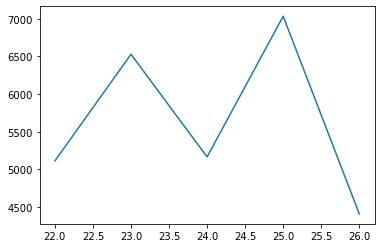

In [167]:
# Plotting the sentiment on a day basis
#plt.plot([22,23,24,25,26], sum)

In [38]:
total.describe()

count    120.000000
mean       2.117449
std       29.549870
min     -145.598581
25%       -9.194917
50%        3.577758
75%       20.755786
max       77.080800
Name: Score, dtype: float64

Since the sentiment of the people in this period seems to be low, let's add an arbitrary value to make its graph prettier

In [15]:
total+=800

Lets plot the hourly sums to observe the changes in the peoples sentiment on an hourly basis
As you can see, there was a sharp decline of the peoples sentiment on 23/02/21

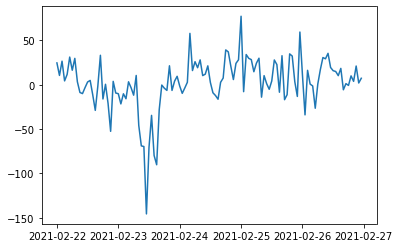

In [10]:
# Plot the sentiment score model
plt.plot(total)

In [22]:
tweets['Datetime'].max()

Timestamp('2021-02-26 23:59:16+0000', tz='UTC')

Now that we have the peoples sentiment lets compare it the actual stock prices

In [11]:
# Import the Yahoo Finance library to get stock prices
import yfinance as yf

In [12]:
# Get tsla stock prices from 22/02/21 to 01/03/21
tsla = yf.Ticker("TSLA")
tsla_stock = tsla.history(
    start="2021-02-22",
    end="2021-03-01",
    interval='60m'
).reset_index()

In [54]:
tsla_stock

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-02-22,762.640015,768.500000,710.200012,714.500000,37269700,0,0
1,2021-02-23,662.130005,713.609985,619.000000,698.840027,66606900,0,0
2,2021-02-24,711.849976,745.000000,694.169983,742.020020,36767000,0,0
3,2021-02-25,726.150024,737.210022,670.580017,682.219971,39023900,0,0
4,2021-02-26,700.000000,706.700012,659.510010,675.500000,41011300,0,0


Lets get the stock details on an hourly basis

In [15]:
tsla = yf.Ticker("TSLA")
tsla_stock = tsla.history(
    start=(tweets['Datetime'].min()).strftime('%Y-%m-%d'),
    end=tweets['Datetime'].max().strftime('%Y-%m-%d'),
    interval='60m'
).reset_index()

In [18]:
tsla_stock

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-02-22 09:30:00-05:00,762.640015,768.320007,751.130005,752.949219,8400327,0,0
1,2021-02-22 10:30:00-05:00,752.950012,754.940002,735.000000,744.979980,8119527,0,0
2,2021-02-22 11:30:00-05:00,744.979980,749.900024,739.500000,741.049988,2545407,0,0
3,2021-02-22 12:30:00-05:00,741.150024,746.091003,739.358582,743.219971,2134844,0,0
4,2021-02-22 13:30:00-05:00,743.150024,745.390015,737.739990,738.000000,1934571,0,0
5,2021-02-22 14:30:00-05:00,737.770020,738.530029,719.549988,720.905029,5468306,0,0
6,2021-02-22 15:30:00-05:00,721.099976,723.500000,710.200012,714.710022,6510511,0,0
7,2021-02-23 09:30:00-05:00,662.130005,694.239990,619.000000,691.270020,29830758,0,0
8,2021-02-23 10:30:00-05:00,691.419983,708.989990,680.049988,687.130005,11994217,0,0
9,2021-02-23 11:30:00-05:00,687.049988,693.306702,668.820007,681.253418,6067487,0,0


Plot both the stock prices and the peoples sentiment on the same graph
As you can see there is noticeable correlation between the two

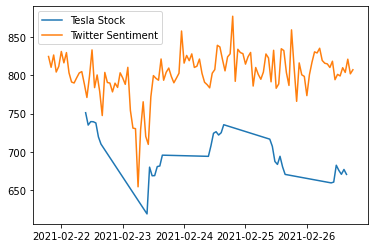

In [16]:
# Plot the Stock Price and Sentiment Variation line on the same plot to observe the relation
plt.plot(tsla_stock['Datetime'], tsla_stock['Low'], label="Tesla Stock")
plt.plot(total, label="Twitter Sentiment")
plt.legend()
plt.show()

Lets find Persons Correlation Coefficient to find the degree of correlation

In [63]:
r = np.corrcoef(tsla_stock['Low'],total_day)
r

array([[1.        , 0.69344475],
       [0.69344475, 1.        ]])

A correlation of about 0.7 indicates a strong correlation

In [ ]:
In this case we looked at a precise period when peoples sentiment of Tesla on Twitter went crazy. We can observe that simultaneously, the stock price of Tesla tumbled.
This model is useful to use in real time in the event something triggers the sentiment of the people towards a company/ stock to rise and fall as we can then expect a similar change in the stock prices